## **Import csv file (Output from vader)**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset2.0.csv to dataset2.0.csv


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
df = pd.read_csv('dataset2.0.csv')

In [ ]:
#imported dataset
df

,Unnamed: 0,tweet,Analysis
0,0,"Tata Posts 38% Growth In Nov 2021 – Nexon, Al...",1
1,1,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...",1
2,2,Hi friends I am a Giveway hunter and i will op...,1
3,3,Look for other dealer Tata Safari is avail...,1
4,4,"11,000 km in 5 months with my Tata Safari: Own...",0
...,...,...,...
1817,1817,"At Pothens Mahindra, Kollam, we delivered the...",1
1818,1818,Alexa in XUV700 says MG Hector is better😳😛 #bu...,1
1819,1819,So even XUV700 agrees MG Hector is a better ca...,1
1820,1820,The celebrations begin early as we deliver 70...,0


In [ ]:
del df['Unnamed: 0']

In [ ]:
df

,tweet,Analysis
0,"Tata Posts 38% Growth In Nov 2021 – Nexon, Al...",1
1,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...",1
2,Hi friends I am a Giveway hunter and i will op...,1
3,Look for other dealer Tata Safari is avail...,1
4,"11,000 km in 5 months with my Tata Safari: Own...",0
...,...,...
1817,"At Pothens Mahindra, Kollam, we delivered the...",1
1818,Alexa in XUV700 says MG Hector is better😳😛 #bu...,1
1819,So even XUV700 agrees MG Hector is a better ca...,1
1820,The celebrations begin early as we deliver 70...,0


 # **Data Splitting into Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Analysis) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (1457, 2)
valid shape :  (365, 2)


# **Counter Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.tweet)
X_valid = vectorizer.transform(valid.tweet)

y_train = train.Analysis
y_valid = valid.Analysis

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (1457, 1966)
X_train.shape :  (365, 1966)
y_train.shape :  (1457,)
y_valid.shape :  (365,)


# **Naive Bayes Classifier** 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9361702127659575
Validation accuracy Score :  0.821917808219178
              precision    recall  f1-score   support

          -1       0.86      0.66      0.75        85
           0       0.91      0.78      0.84       138
           1       0.75      0.96      0.84       142

    accuracy                           0.82       365
   macro avg       0.84      0.80      0.81       365
weighted avg       0.84      0.82      0.82       365



# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8712328767123287
              precision    recall  f1-score   support

          -1       0.83      0.90      0.86        60
           0       0.94      0.78      0.85       144
           1       0.84      0.94      0.89       161

    accuracy                           0.87       365
   macro avg       0.87      0.87      0.87       365
weighted avg       0.88      0.87      0.87       365



# **Suport Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9869595058339052
Validation accuracy Score :  0.8794520547945206
              precision    recall  f1-score   support

          -1       0.77      0.96      0.85        52
           0       0.95      0.80      0.87       141
           1       0.87      0.92      0.90       172

    accuracy                           0.88       365
   macro avg       0.86      0.89      0.87       365
weighted avg       0.89      0.88      0.88       365



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9986273164035689
Validation accuracy Score :  0.8931506849315068
              precision    recall  f1-score   support

          -1       0.88      0.90      0.89        63
           0       0.90      0.84      0.87       128
           1       0.90      0.93      0.91       174

    accuracy                           0.89       365
   macro avg       0.89      0.89      0.89       365
weighted avg       0.89      0.89      0.89       365



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy] })
models

,Model,Test accuracy
0,Support Vector Machines,0.879452
1,Logistic Regression,0.893151
2,Random Forest,0.871233
3,Naive Bayes,0.821918


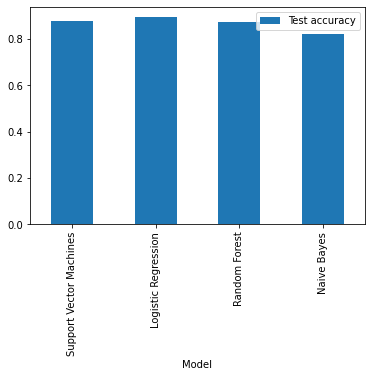

In [ ]:
models.plot('Model', 'Test accuracy', kind='bar')